In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Ocupacio.csv")

# Delete unnecessary columns
df.drop(columns=["Modalitat docencia", "Observacions", "Estudi"], inplace=True)
df.drop(0, axis=0, inplace=True) # Drop the first row as it not needed (it's the only data for that day)

# Handle "Alumnes matriculats"
# Calculate the average excluding rows with 0 or "Sense grup de matricula"
average_alumnes = df.loc[~df["Alumnes matriculats"].isin([0, "Sense grup de matricula"]), "Alumnes matriculats"].astype(float).mean()
average_alumnes = round(average_alumnes)

# Replace 0 and "Sense grup de matricula" with the calculated average
df["Alumnes matriculats"] = df["Alumnes matriculats"].replace({"0": average_alumnes, "Sense grup de matricula": average_alumnes})
df['Alumnes matriculats'] = df['Alumnes matriculats'].astype(int)

# Clean "Activitat" column
def clean_activitat(activity):
    # Regular expression pattern to extract relevant activity types
    pattern = r'(Classe|Examen|Presentació|Lectura de tesis|Seminari|Defensa TFG|Docència)'
    match = re.search(pattern, activity)
    if match:
        return match.group()
    elif activity.startswith('10'):
        return "Classe"
    else:
        return "Altre"

# Apply the function to clean the "Activitat" column
df["Activitat"] = df["Activitat"].apply(clean_activitat)

"""# Drop rows where "Activitat" is None (not one of the relevant activity types)
df = df.dropna(subset=["Activitat"])"""

# Save the cleaned dataset
df.to_csv("HourlyOcupacio.csv", index=False)


In [ ]:
print(df.head(4))

  Data inicial Hora inicial  Data final Hora final Total hores    Espai  \
1   07/01/2022         9:00  07/01/2022      11:30         2,5  Q3/1007   
2   07/01/2022         9:00  07/01/2022      11:30         2,5  Q1/1003   
3   07/01/2022         9:00  07/01/2022      11:30         2,5  Q3/1011   
4   07/01/2022         9:00  07/01/2022      11:30         2,5  Q2/1013   

  Activitat  Alumnes matriculats  
1    Examen                   49  
2    Examen                   49  
3    Examen                   49  
4    Examen                   49  


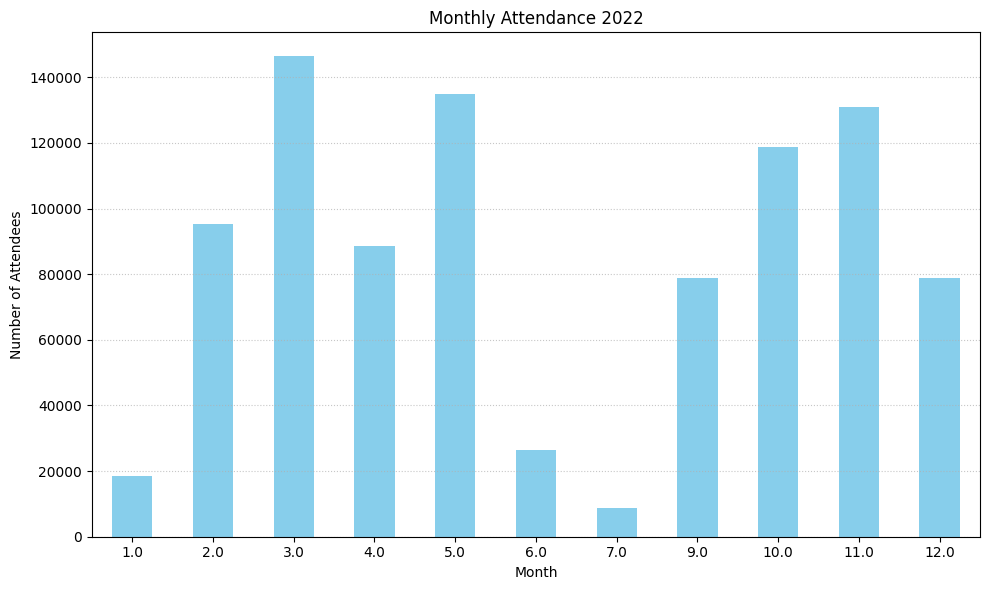

In [ ]:
df['Data inicial'] = pd.to_datetime(df['Data inicial'], format='%d/%m/%Y')

# Group by month and count attendees
monthly_attendance = df.groupby(df['Data inicial'].dt.month)['Alumnes matriculats'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_attendance.plot(kind='bar', color='skyblue')
plt.title('Monthly Attendance 2022')
plt.xlabel('Month')
plt.ylabel('Number of Attendees')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

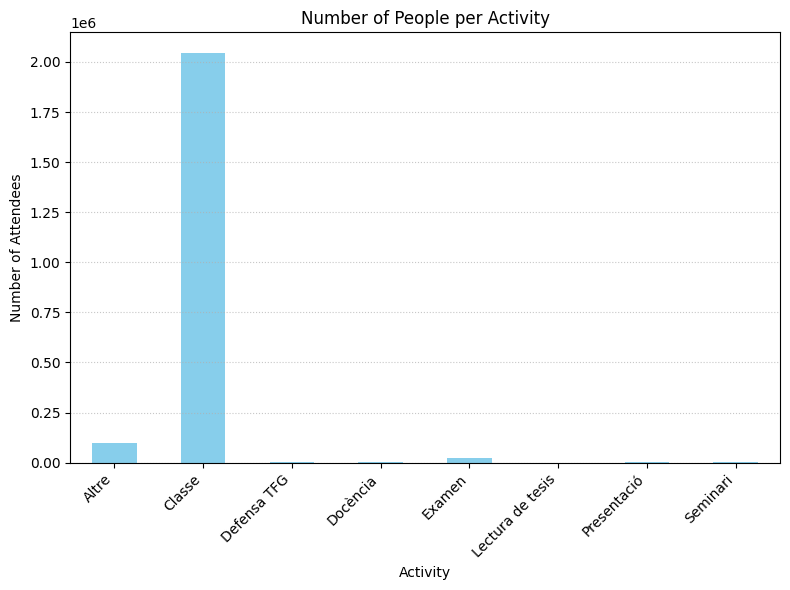

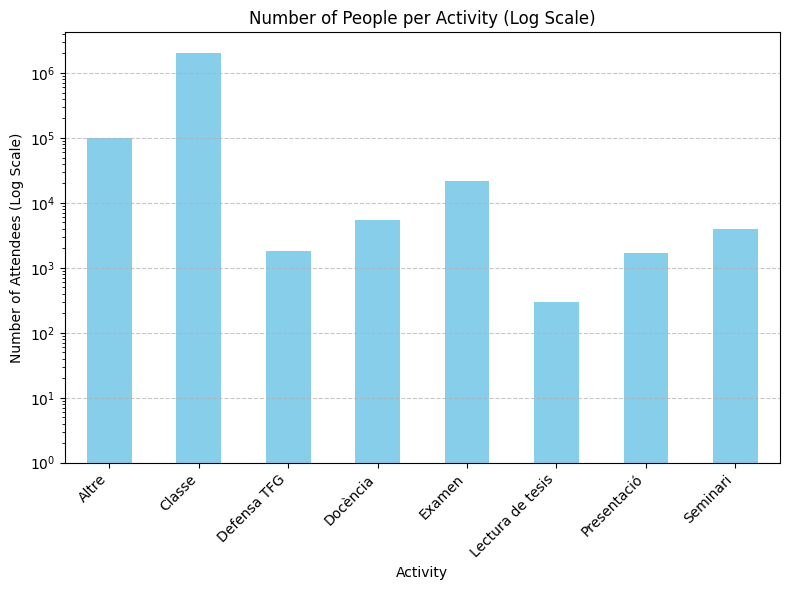

In [ ]:
# Group by activity and count attendees
activity_counts = df.groupby('Activitat')['Alumnes matriculats'].sum()

# Plotting
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People per Activity')
plt.xlabel('Activity')
plt.ylabel('Number of Attendees')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting with logarithmic scale
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar', color='skyblue', log=True)
plt.title('Number of People per Activity (Log Scale)')
plt.xlabel('Activity')
plt.ylabel('Number of Attendees (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Convert date columns to datetime objects
df['Data inicial'] = pd.to_datetime(df['Data inicial'])
df['Day of Week'] = df['Data inicial'].dt.day_name()
df['Month'] = df['Data inicial'].dt.month_name()

# Convert 'Total hores' column to float and then to integer
df['Total hores'] = df['Total hores'].str.replace(',', '.').astype(float)

# Group by date and classroom, summing up 'Alumnes Matriculats' and 'Total hores'
merged_df = df.groupby(['Data inicial', 'Espai']).agg({
    'Alumnes matriculats': 'sum',
    'Total hores': 'sum'
}).reset_index()

# Add day of the week and month columns to merged_df
merged_df['Day of Week'] = merged_df['Data inicial'].dt.day_name()
merged_df['Month'] = merged_df['Data inicial'].dt.month_name()

# Rename columns if needed
merged_df.rename(columns={'Data inicial': 'Date', 'Espai': 'Classroom'}, inplace=True)


In [ ]:
# Display the result
merged_df.head(30)

,Date,Classroom,Alumnes matriculats,Total hores,Day of Week,Month
0,2022-01-07,Q1/1003,49,2.5,Friday,January
1,2022-01-07,Q1/1007,49,2.5,Friday,January
2,2022-01-07,Q1/1011,98,4.5,Friday,January
3,2022-01-07,Q2/1003,49,2.0,Friday,January
4,2022-01-07,Q2/1009,49,2.5,Friday,January
5,2022-01-07,Q2/1013,49,2.5,Friday,January
6,2022-01-07,Q3/1007,147,7.0,Friday,January
7,2022-01-07,Q3/1011,147,7.0,Friday,January
8,2022-01-07,Q4/0007,49,8.0,Friday,January
9,2022-01-07,Q4/0011,49,8.0,Friday,January


from matplotlib import pyplot as plt
_df_0['Alumnes matriculats'].plot(kind='hist', bins=20, title='Alumnes matriculats')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total hores'].plot(kind='hist', bins=20, title='Total hores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Day of Week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Alumnes matriculats', y='Total hores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Alumnes matriculats']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day of Week')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day of Week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Alumnes matriculats')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Total hores']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day of Week')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day of Week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Total hores')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day of Week')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day of Week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Alumnes matriculats']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Day of Week')):
  _plot_series(series, series_name, i)
  fig.legend(title='Day of Week', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Alumnes matriculats')

from matplotlib import pyplot as plt
_df_8['Alumnes matriculats'].plot(kind='line', figsize=(8, 4), title='Alumnes matriculats')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Total hores'].plot(kind='line', figsize=(8, 4), title='Total hores')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Day of Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Alumnes matriculats', y='Day of Week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Day of Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Total hores', y='Day of Week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

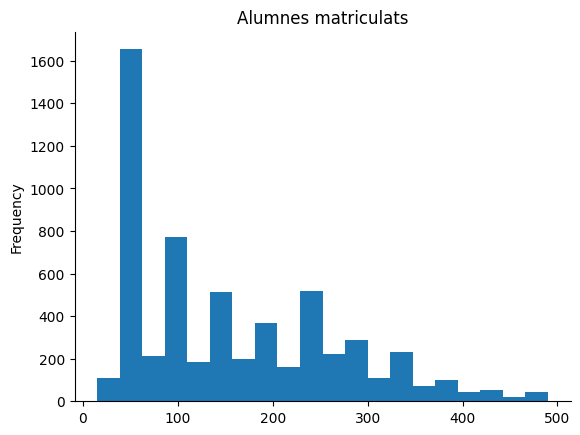

In [ ]:
# @title Alumnes matriculats

from matplotlib import pyplot as plt
merged_df['Alumnes matriculats'].plot(kind='hist', bins=20, title='Alumnes matriculats')
plt.gca().spines[['top', 'right',]].set_visible(False)